## 1. 데이터 정의
---

In [64]:
from sklearn import datasets
iris=datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
iris['feature_names'], iris['target_names']

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [58]:
x_data = iris['data']
print(x_data[:10])
x_data.shape

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


(150, 4)

In [59]:
y_data = iris['target']
print(y_data[:200])
y_data.shape

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


(150,)

## 2. 데이터 시각화
---

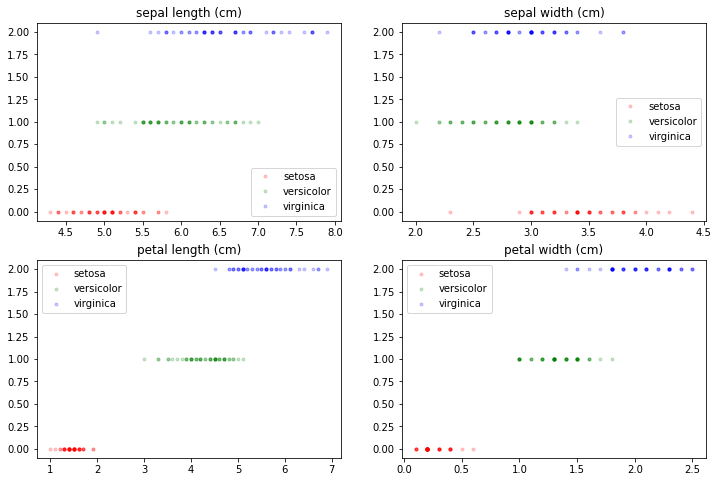

In [60]:
plt.figure(figsize=(12,8))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.title(iris['feature_names'][i])
  plt.plot(x_data[:,i][y_data==0],y_data[y_data==0] , color='r', alpha=0.2, marker='.', linestyle='')
  plt.plot(x_data[:,i][y_data==1],y_data[y_data==1] , color='g', alpha=0.2, marker='.', linestyle='')
  plt.plot(x_data[:,i][y_data==2],y_data[y_data==2] , color='b', alpha=0.2, marker='.', linestyle='')
  plt.legend(iris['target_names'])
plt.show()

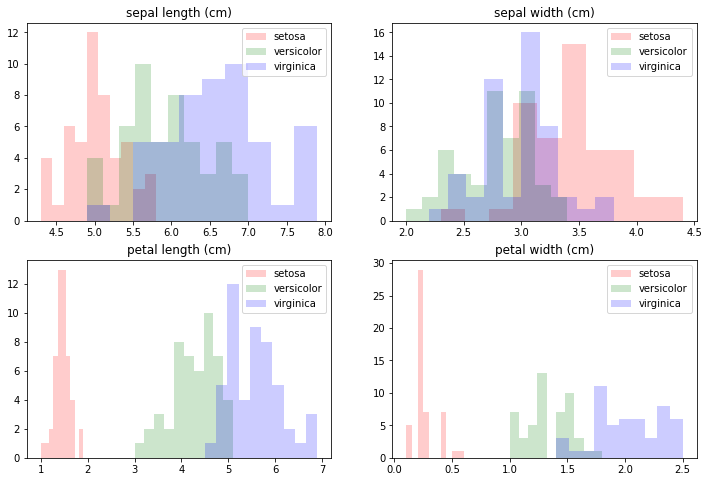

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

for i in range(4):
  plt.subplot(2,2,i+1)
  plt.title(iris['feature_names'][i])
  plt.hist(x_data[:,i][y_data==0], color='r', alpha=0.2)
  plt.hist(x_data[:,i][y_data==1], color='g', alpha=0.2)
  plt.hist(x_data[:,i][y_data==2], color='b', alpha=0.2)
  plt.legend(iris['target_names'])
plt.show()

## 3. 데이터 전처리
---


### **One-hot 코딩**


In [79]:
from tensorflow.keras.utils import to_categorical
y_data_onehot = to_categorical(y_data, num_classes=3)
print(y_data_onehot[:20]) 

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


### **train-test split**

In [83]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, 

                                                    y_data_onehot, 

                                                    test_size=0.2, 

                                                    shuffle=True, 

                                                    random_state=34)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 3) (30, 3)


## 4. 모델사용
---

### **Softmax regression**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.summary()

model.compile(optimizer = optimizers.SGD(learning_rate=0.01),
              loss = 'categorical_crossentropy',
              metrics=['acc']
              )
model.fit(x_train, y_train, epochs=500)

In [89]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 161ms/step - loss: 0.3029 - acc: 1.0000


[0.30287793278694153, 1.0]

### **Decision Tree**

Text(148.8, 201.90857142857143, 'X[3] <= -0.526\ngini = 0.442\nsamples = 120\nvalue = [[81, 39]\n[85, 35]\n[74, 46]]')

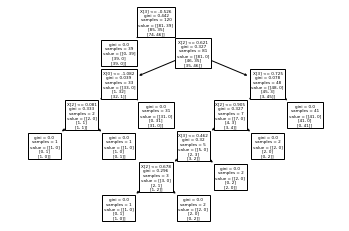

In [96]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier.fit(x_train, y_train)
tree.plot_tree(classifier)[0]

In [97]:
classifier.score(x_test, y_test)

0.9333333333333333